# Specify parameters

In [3]:
subj = 'UI399'
root_dir = '/Users/alia/Documents/mandarin'

# Import necessary packages

In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import scale
from os.path import join, exists
from os import makedirs
import h5py
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import fftpack
import matplotlib.pyplot as plt
from scipy import signal
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from numpy import linalg as LA
from sklearn.preprocessing import scale
import random
import librosa

# Create fig/output directories

In [5]:
# Create directories
fdir = root_dir + '/mandarin_ffr/fig/' + subj
odir = root_dir + '/output/' + subj

if not exists(fdir):
    makedirs(fdir)
if not exists(odir):
    makedirs(odir)

# Read data

In [30]:
# Where are the data?
dir_data = ''.join([root_dir, '/', subj, '/data'])
file_ECoG = ''.join([dir_data, '/', subj, '_dat_FFR_noCAR_notch_hp_allTrials.mat'])
# file_ECoG = ''.join([dir_data, '/', subj, '_dat_FFR.mat'])

# Load the .mat file
f = h5py.File(file_ECoG, 'r')

# Read ECoG data
hg_stim = np.array(f['dat']['hg_stim']) # trial * tp * ch
badChans = f['dat']['badChans'].value.flatten() - 1 # Correct for 0-indexing
time_axis = (np.round(f['dat']['time_axis'].value.flatten(), 3) * 1000).astype(int) # Use int b/c float precision

# Import behav
list_col = ['accuracy', 'block', 'choice', 'rt', 'speaker', 'syllable', 'tone', 'trial']
behav = pd.DataFrame(columns = list_col)
for icol in list_col:
    if np.in1d(icol, ['speaker', 'syllable']):
        for i in range(0, behav.shape[0]):
            behav.loc[i, icol] = ''.join(map(chr, f[f['dat']['behav'][icol][0,i]]))
    else:
        behav[icol] = np.array(f['dat']['behav'][icol]).flatten()
        
for icol in ['accuracy', 'block', 'choice', 'tone', 'trial']:
    behav[icol] = behav[icol].astype(int)
    
f.close()

#extract data from 0-500 ms 


# Get rid of NaN trials, if any
if np.in1d(subj, ['EC157','EC159', 'UI399']):
    nanTrial = np.unique(np.where(np.isnan(hg_stim))[0])
    if nanTrial.shape[0] > 0: # perform only if NaN trials exist at all
        hg_stim = np.delete(hg_stim, nanTrial, 0)
        behav = behav.drop(nanTrial, axis = 0).reset_index(drop = True)

# What are the "good" channels?
good_ch_vector = np.ones((hg_stim.shape[2])).astype(int)
good_ch_vector[badChans] = 0
goodChans = np.where(good_ch_vector)[0]
    
# Create index for behav (not literally the trial)
behav['Trial'] = range(0, behav.shape[0])

# Add the "file" column
behav['file'] = behav['syllable'].astype(str) + behav['tone'].astype(str) + '-' + behav['speaker'].astype(str) + 'N'

In [ ]:
test1 = behav[behav['block'] < 17]
# test2 = test1[test1['tone'] == 1]
# test = test2[test2['speaker'] == 'b']
len(test1['trial'])

In [ ]:
plt.plot(time_axis, np.mean(hg_stim[np.where(behav['file'] == 'ma3-bN')[0], :, 38], axis = 0))
plt.show()

In [ ]:
## make data frames with male speakers tone 1 and tone 2 files 
male_trials_T1 = pd.DataFrame()
male_trials_T3 = pd.DataFrame()
male_trials = pd.DataFrame()
male_trials['tone'] = behav['tone']
male_trials['file'] = behav['file']
male_trials['speaker'] = behav['speaker']
male_trials['syllable'] = behav['syllable']
tone1 = male_trials[male_trials.tone == 1]
tone2 = male_trials[male_trials.tone == 2]
tone3 = male_trials[male_trials.tone == 3]
tone4 = male_trials[male_trials.tone == 4]


male_trials_h = male_trials[male_trials.speaker == 'b']
#female tone 2 'di'
female_tones = male_trials[male_trials.speaker == 'h']
# female_tones1 = female_tones[female_tones.syllable == 'di']
female_tones2 = female_tones[female_tones.tone == 2]

male_trials_T3 = male_trials_h
male_trials_T2 = male_trials_T3[male_trials.tone == 2]
male_trials_T4 = male_trials_T3[male_trials.tone == 4]
male_trials_T1 = male_trials_T3[male_trials.tone == 1]
male_trials_T3 = male_trials_T3[male_trials.tone == 3]


# print(tone1)
# print(female_tones1)





## Export neural response to sound file

In [21]:
max(myhg)

7.0531307424236926

In [33]:
behav1 = behav.sort_values(['file'])

In [42]:
tones = np.unique(behav['file'])
tones

array(['bu1-aN', 'bu1-bN', 'bu1-hN', 'bu1-iN', 'bu2-aN', 'bu2-bN',
       'bu2-hN', 'bu2-iN', 'bu3-aN', 'bu3-bN', 'bu3-hN', 'bu3-iN',
       'bu4-aN', 'bu4-bN', 'bu4-hN', 'bu4-iN', 'di1-aN', 'di1-bN',
       'di1-hN', 'di1-iN', 'di2-aN', 'di2-bN', 'di2-hN', 'di2-iN',
       'di3-aN', 'di3-bN', 'di3-hN', 'di3-iN', 'di4-aN', 'di4-bN',
       'di4-hN', 'di4-iN', 'lu1-aN', 'lu1-bN', 'lu1-hN', 'lu1-iN',
       'lu2-aN', 'lu2-bN', 'lu2-hN', 'lu2-iN', 'lu3-aN', 'lu3-bN',
       'lu3-hN', 'lu3-iN', 'lu4-aN', 'lu4-bN', 'lu4-hN', 'lu4-iN',
       'ma1-aN', 'ma1-bN', 'ma1-hN', 'ma1-iN', 'ma2-aN', 'ma2-bN',
       'ma2-hN', 'ma2-iN', 'ma3-aN', 'ma3-bN', 'ma3-hN', 'ma3-iN',
       'ma4-aN', 'ma4-bN', 'ma4-hN', 'ma4-iN', 'mi1-aN', 'mi1-bN',
       'mi1-hN', 'mi1-iN', 'mi2-aN', 'mi2-bN', 'mi2-hN', 'mi2-iN',
       'mi3-aN', 'mi3-bN', 'mi3-hN', 'mi3-iN', 'mi4-aN', 'mi4-bN',
       'mi4-hN', 'mi4-iN'], dtype=object)

In [78]:
myhg = hg_stim[i, :, 15]

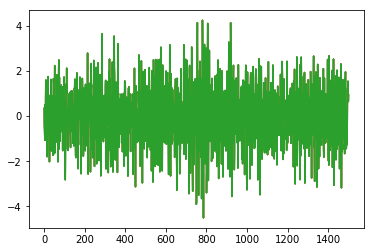

In [81]:
plt.plot(myhg)
plt.show()

In [77]:
for ts in tones:
    test = np.where(behav['file'] == ts)[0]
    for x in test:
        myhg = hg_stim[x, :, 15]
        f,t, Sxx = signal.spectrogram(myhg, 1000, noverlap = 76, nperseg =90)
        librosa.output.write_wav('/Users/alia/Desktop/FFR/' + str(ts) + '_' + str(x) +'.wav', Sxx, 20000)
        

# test = np.where((behav1['block'] < 22))[0]
# for i in range(len(test)): 
#     print(behav1['file'][i])
# #     myhg = hg_stim[i, :, 15]
# #     librosa.output.write_wav('/Users/alia/Desktop/FFR/' + str(i) +'_'+ str(behav['file'][i]) +'.wav', myhg, 1000)

In [ ]:
# ## we want to average across each stimuli - so male tone 1, male tone 3
# myhg = []
# for i in male_trials_T1['file']:
#     myidx = np.where(behav['file'] == i)[0]
#     myhg1 = hg_stim[myidx, :, 15]
#     myhg_mean = np.mean(myhg1, axis =0)
# #     print(myhg_mean)
#     myhg= np.append(myhg,myhg_mean)
#     time_axis = np.linspace(-500, 500, 500).astype(int)

# myspec = np.fft.rfft(myhg[(time_axis >= 0) & (time_axis <= 1000)])
# # print(np.mean(myhg,axis=0))

In [ ]:
# Get indices of trials where "file" is a member of male_trials_T1['file']
# myidx = np.where(np.in1d(behav['file'], female_tones2['file'].unique()))[0]
myidx = np.where(np.in1d(behav['file'], male_trials_T4['file'].unique()))[0]

# Average across the trials
myhg = np.mean(hg_stim[myidx, :, 119], axis = 0)
print(myhg)
# myhg = np.mean(hg_stim, axis=0)
# Perform FFT
# myspec = np.fft.rfft(myhg)

# this is to extract the times between 0 and 100 
myspec = np.fft.rfft(myhg[(time_axis >= -500) & (time_axis <= 1000)])
# myspec = np.fft.rfft(myhg,norm = "ortho")



In [ ]:
# fig, axes = plt.subplots(6, 2)
plt.figure(figsize = (20,5))
plt.plot(np.linspace(0, 500, myspec.shape[0]), abs(myspec))
# plt.subplot(2,3,2)


In [ ]:
# plt.figure(figsize = (20,5))
fig, axes = plt.subplots(5,2, sharex=True, sharey=True)
a = 1
plt.figure(figsize = (20,31))
for i in range(17):
    myidx = np.where(np.in1d(behav['file'], behav['file'].unique()))[0]
    myhg = np.mean(hg_stim[myidx, :, i], axis = 0)
    myspec = np.fft.rfft(myhg[(time_axis >= 0) & (time_axis <= 250)])
    a+=1
    plt.subplot(5,2,1)
    myspec = np.fft.rfft(myhg,norm = "ortho")
    plt.plot(np.linspace(0, 500, myspec.shape[0]), abs(myspec))
#     plt.figure(figsize = (10,5))
    plt.title(i)

# plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5)
plt.show()

In [ ]:
print(hg_sitm.shape)

In [ ]:
## normalize fft 
myhg = np.mean(hg_stim[myidx, :, 15], axis = 0)
myspec = np.fft.rfft(myhg[(time_axis >= -500) & (time_axis <= 1000)])
# myspec = np.fft.rfft(myhg,norm = "ortho")
plt.figure(figsize = (20,5))
plt.plot(np.linspace(0, 500, myspec.shape[0]), abs(myspec))
plt.show()



In [ ]:
## plot all HG elec spectrums
import matplotlib.gridspec as gridspec
fig, axes = plt.subplots(nrows=2, ncols=4, sharex=True)
axes[0, 0].plot(np.linspace(-500, 1000, myspec13.shape[0]), abs(myspec13))
axes[0, 1].plot(np.linspace(-500, 1000, myspec14.shape[0]), abs(myspec14))
axes[0, 2].plot(np.linspace(-500, 1000, myspec15.shape[0]), abs(myspec15))
axes[0, 3].plot(np.linspace(-500, 1000, myspec16.shape[0]), abs(myspec16))
axes[1, 0].plot(np.linspace(-500, 1000, myspec17.shape[0]), abs(myspec17))
axes[1, 1].plot(np.linspace(-500, 1000, myspec18.shape[0]), abs(myspec18))
axes[1, 2].plot(np.linspace(-500, 1000, myspec19.shape[0]), abs(myspec19))
axes[1, 3].plot(np.linspace(-500, 1000, myspec22.shape[0]), abs(myspec22))
# fig = 
# plt.subplot_tool()
# fig.tight_layout()
plt.show()



In [ ]:
#gets the mean for the raw data set for a given channel

mymean = np.mean(hg_stim[:, :, 15], axis = 0)

#calculates the square for the mean of the data set to get all values to be positive
RMS_mymean = np.square(mymean)

#get prestim and after stim means
prestim = mymean[np.where(time_axis < 0)[0]]
poststim = mymean[np.where(time_axis >= 0)[0]]

#get prestim and after stim
RMS_prestim = np.sqrt(np.mean(np.square(prestim)))
RMS_poststim = np.sqrt(np.mean(np.square(poststim)))

print(RMS_poststim/RMS_prestim)


In [ ]:
#this creates a dataframe with all the RMS scores for each channel 
data = pd.DataFrame()
data['chan'] = range(1,257)
data['RMS'] = 0.0
for i in range(1,256):
    mymean = np.mean(hg_stim[:, :, i], axis = 0)
    prestim = mymean[np.where(time_axis < 0)[0]]
    poststim = mymean[np.where(time_axis >= 0)[0]]
    RMS_prestim = np.sqrt(np.mean(np.square(prestim)))
    RMS_poststim = np.sqrt(np.mean(np.square(poststim)))
    RMS = RMS_poststim/RMS_prestim
    data['RMS'][i] = RMS

#takes the data frame and gets all the channels that have a larger than one RMS
        
    



In [ ]:
#takes the data from RMS and exports chanels with greater than 1 RMS values
data = data[data.RMS > 1]
data.to_csv('data.csv')

In [ ]:
for i in range(13,19):
    mymean = np.mean(hg_stim[:, :, i], axis = 0)
    preRMS = np.sqrt(np.mean(np.square(mymean[time_axis < 0])))
    plt.title(data['chan'][i])
#     plt.xlim(-100, 200)
    time_axis = np.linspace(-500, 1000, 1501)
    plt.plot(time_axis, mymean, 'b')
    plt.show()

In [ ]:
#plot each raw file for the HG that has a RMS above 1
for i in range(135,136):
    mymean = np.mean(hg_stim[:, :, i], axis = 0)
    preRMS = np.sqrt(np.mean(np.square(mymean[time_axis < 0])))
    postRMS = np.sqrt(np.mean(np.square(mymean[time_axis >= 0])))
    plt.plot(time_axis[time_axis >= 0], np.repeat(postRMS, len(time_axis[time_axis >= 0])), 'r')
    plt.title(data['chan'][i])
    plt.xlim(-100, 200)
    time_axis = np.linspace(-500, 1000, 1501)
    plt.plot(time_axis, mymean, 'b')
    plt.show()
#     prestim = mymean[np.where(time_axis < 0)[0]]
#     poststim = mymean[np.where(time_axis >= 0)[0]]
#     RMS_prestim = np.sqrt(np.mean(np.square(prestim)))
#     RMS_poststim = np.sqrt(np.mean(np.square(poststim)))
#     RMS = RMS_poststim/RMS_prestim

In [ ]:
#plot sqrt data
for i in range(214,215):
    mymean = np.mean(hg_stim[:, :, i], axis = 0)
    RMS_mymean = np.square(mymean)
    preRMS = np.sqrt(np.mean(np.square(RMS_mymean[time_axis < 0])))
    postRMS = np.sqrt(np.mean(np.square(RMS_mymean[time_axis >= 0])))
    plt.plot(time_axis, RMS_mymean, 'b')
    plt.plot(time_axis[time_axis >= 0], np.repeat(postRMS, len(time_axis[time_axis >= 0])), 'r')
    plt.plot(time_axis[time_axis < 0], np.repeat(preRMS, len(time_axis[time_axis < 0])), 'g')
    plt.title(data['chan'][i])
    plt.xlim(-500, 1000)
    time_axis = np.linspace(-500, 1000, 1501)
    plt.show()

In [ ]:
# necessary packages
import numpy as np
import matplotlib.pyplot as plt

# This is the time axis
time_axis = np.linspace(-500, 1000, 1501)

# Fake data
# mymean = np.random.normal(size = len(time_axis))

# Calculate RMS
preRMS = np.sqrt(np.mean(np.square(mymean[time_axis < 0])))
postRMS = np.sqrt(np.mean(np.square(mymean[time_axis >= 0])))

# Plot the signal
plt.plot(time_axis, mymean, 'b')
plt.title('Electrode 16 Mean Waveform')

# Plot pre-RMS
# plt.plot(time_axis[time_axis < 0], np.repeat(preRMS, len(time_axis[time_axis < 0])), 'b')

# Plot post-RMS
# plt.plot(time_axis[time_axis >= 0], np.repeat(postRMS, len(time_axis[time_axis >= 0])), 'r')

# Display
plt.show()

In [ ]:
plt.figure(figsize = (20,5))
time_axis = np.linspace(-500, 1000, 1501)
fs = 1000
myidx = np.where(np.in1d(behav['file'], female_tones1['file'].unique()))[0]
myhg = np.mean(hg_stim[myidx, :, 119], axis = 0)
RMS_mymean = np.square(myhg)
myhg = RMS_mymean[(time_axis >= -500) & (time_axis <= 1000)]
# norm2 = normalize(myhg[:,np.newaxis], axis=0).ravel()
# plt.plot(time_axis,(myhg))
plt.plot(time_axis,(myhg))
plt.show()
    

In [ ]:
time = pd.DataFrame()
time['time_axis'] = time_axis
time['means'] = np.mean(hg_stim[np.where(behav['file'] == 'ma3-bN')[0], :, 38], axis = 0)

RMS_prestim = np.sqrt(np.mean(np.square(prestim)))
RMS_poststim = np.sqrt(np.mean(np.square(poststim)))

before = 0
countb = 0
after = 0
counta = 0
for i in range(0,len(time)):
    if time['time_axis'][i] < 0: 
        before += time['means'][i]
        countb += 1
    else:
        after += time['means'][i]
        counta += 1
average_before = before/countb
average_after = after/counta

RMS_before = np.sqrt(np.mean(np.square(average_before)))
RMS_after = np.sqrt(np.mean(np.square(average_after)))

print(RMS_before)
print(RMS_after)

SNR = RMS_after/RMS_before
print(SNR)





In [ ]:
mystim = 'ma3-bN'
myidx = np.where(behav['file'] == mystim)[0]

In [ ]:
myhg = hg_stim[myidx, :, 38]
time_axis = np.linspace(-500, 1000, 1501).astype(int)

In [ ]:
np.mean(myhg, axis = 0)

In [ ]:
plt.figure(figsize = (20,5))
plt.plot(time_axis,np.mean(myhg, axis = 0))
plt.show()dd

In [ ]:
myspec = np.fft.rfft(np.mean(myhg, axis = 0))


In [ ]:
plt.figure(figsize = (20,5))
plt.plot(np.linspace(0, 500, myspec.shape[0]), np.abs(myspec))
plt.show()

In [ ]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.spectrogram.html

In [ ]:
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display

In [ ]:
#list info
list_sp = ['a', 'i']
list_syll = ['bu', 'di', 'bu', 'ma', 'mi']
list_tone = ['1', '2', '3', '4']


In [ ]:
plt.figure(figsize = (16,16))
iter_plot = 1

for i in range(160,168):
    myidx = np.where(np.in1d(behav['file'], behav['file'].unique()))[0]
    myhg = np.mean(hg_stim[myidx, :, i], axis = 0)
    myhg = myhg[(time_axis >= 0) & (time_axis <= 1000)]
    sound = myhg
    sound = np.asarray(sound)
    samprate = 1000
    myfmax = 500
    
#     appendlen = sound.shape[0]
#     sound = np.append(np.zeros(appendlen), sound)
#     sound = np.append(sound , np.zeros(appendlen))

    # Generate the spectrogram
    D = np.abs(librosa.stft(sound)) ** 2
    S = librosa.feature.melspectrogram(y = sound, sr = samprate, fmax = myfmax, fmin = 80, hop_length = 28)
    dbS = librosa.power_to_db(S, ref=np.max)
    print(dbS.shape)

    plt.subplot(2, 5, iter_plot)
    iter_plot = iter_plot + 1
                # 

    librosa.display.specshow(dbS, y_axis = 'mel', fmax = myfmax)
#     plt.imshow(dbS[20:, :], origin = 'lower', cmap = 'PuOr_r', aspect = 'auto')    
    plt.colorbar(format='%+2.0f dB')

plt.show()


In [ ]:
from sklearn.preprocessing import scale

myhg = []
for i in range(16,25):
    myidx = np.where(np.in1d(behav['file'], behav['file'].unique()))[0]
    myhg1 = np.mean(hg_stim[myidx, :, i], axis = 0)
    myhg = np.append(myhg,myhg1)
print(myhg)


#     #     myspec = np.fft.rfft(myhg[(time_axis >= -500) & (time_axis <= 1000)])
sound = myhg
sound = np.asarray(sound)
samprate = 1000
myfmax = 500
    
#     #     appendlen = sound.shape[0]
#     #     sound = np.append(np.zeros(appendlen), sound)
#     #     sound = np.append(sound , np.zeros(appendlen))

#         # Generate the spectrogram
D = np.abs(librosa.stft(sound)) ** 2
S = librosa.feature.melspectrogram(y = sound, sr = samprate, fmax = myfmax, hop_length = 10)
dbS = librosa.power_to_db(S, ref=np.max)
dbS = scale(dbS, axis = 0)

print(dbS.shape)
# plt.subplot(2, 5, iter_plot)
iter_plot = iter_plot + 1
                # 

librosa.display.specshow(dbS, y_axis = 'mel', fmax = myfmax)
#     plt.imshow(dbS[20:, :], origin = 'lower', cmap = 'PuOr_r', aspect = 'auto')    
plt.colorbar(format='%+2.0f dB')

plt.show()



In [ ]:
##try a different spec
from scipy import signal
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from numpy import linalg as LA
from sklearn.preprocessing import scale
import random

# plt.figure(figsize = (100,30))
iter_plot = 1
plt.figure(figsize = (50,50))

# plt.figure(figsize = (100,30))
for i in range(15,16):
#     print(i+1)
    fs = 1000
    # myidx = np.where(np.in1d(behav['file'], female_tones2['file'].unique()))[0]
    for b in range(1,5):
        for pb in range(17,21):
            myidx = np.where((behav['block'] == pb)&(behav['tone'] == b) & (behav['speaker'] == 'b'))[0]
            myhg = np.mean(hg_stim[myidx, :, i], axis = 0)
            myhg = myhg[(time_axis >= -500) & (time_axis <= 1000)]

            font = {'family' : 'normal',
                'weight' : 'bold',
                'size'   : 5}
            plt.rc('font', **font)

            plt.subplot(4, 4, iter_plot)
            iter_plot = iter_plot + 1
    #         myidx2 = myidx[0:60]

            f,t, Sxx = signal.spectrogram(myhg, fs, noverlap = 76, nperseg =90)
            newspec = Sxx
            plt.pcolormesh(t - 0.5,f,newspec, vmax = np.percentile(Sxx.flatten(), 99.9))
    #         plt.plot([0, 0], [0, 300], 'w')
    #         plt.plot([0.050, 0.050], [0, 300], 'w')
            plt.ylabel('Frequency [Hz]')
            plt.xlabel('Time [sec]')
            plt.title('Tone' + str(b))
        plt.suptitle('Elec'+ str(i+1) + ' ' + 'Passive', fontsize = 30.0)
    #         plt.show()
    plt.show()



In [ ]:
###LOOK AT MINIMUM TRIALS FOR EACH ELEC
from scipy import signal
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from numpy import linalg as LA
from sklearn.preprocessing import scale
import random

iter_plot = 1
# plt.figure(figsize = (50,10))
plt.figure(figsize = (100,30))
for i in range(114,115):
#     print(i+1)
    fs = 1000
    myidx = np.where((behav['tone'] == 4) & (behav['speaker'] == 'b'))[0]
    np.random.shuffle(myidx)
    for b in range(1,5):
        myidx = np.where((behav['block'] > 17)&(behav['tone'] == b) & (behav['speaker'] == 'b'))[0]
        np.random.shuffle(myidx)
        print(len(myidx))
#         for a in range(1,len(myidx)):
        if b == 1:
            myidx = myidx[0:60]
        if b == 2:
            myidx = myidx[0:45]
        if b == 3:
            myidx = myidx[0:60]
        if b == 4:
            myidx = myidx[0:45]
    for a in range(1,len(myidx)):
        myidx = np.where((behav['tone'] == 4) & (behav['speaker'] == 'b'))[0]
        np.random.shuffle(myidx)
        myidx = myidx[1:a]
        myhg = np.mean(hg_stim[myidx, :, i], axis = 0)
        myhg = myhg[(time_axis >= -500) & (time_axis <= 1000)]

#         plt.subplot(1, 4, iter_plot)
#         iter_plot = iter_plot + 1

        f,t, Sxx = signal.spectrogram(myhg, fs, noverlap = 76, nperseg =90)
        newspec = Sxx
        plt.pcolormesh(t - 0.5,f,newspec, vmax = np.percentile(Sxx.flatten(), 99.9))
        plt.ylabel('Frequency [Hz]')
        plt.xlabel('Time [sec]')
        plt.title(a)
        plt.show()

plt.show()


In [ ]:
###LOOK AT SPECIFIC TRIALS NEEDED FOR EACH ELEC
from scipy import signal
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from numpy import linalg as LA
from sklearn.preprocessing import scale
import random
import librosa

iter_plot = 1
num = [8, 16, 32, 64, 128]
# plt.figure(figsize = (50,10))
fig = plt.figure(figsize = (200,100))
# plt.subplots(4, 5, sharey =True)
fig.subplots_adjust(hspace=0.4, wspace=0.4)
# for i in range(119,120):
#     #     print(i+1)
fs = 1000
for tone in range(1,5):
    for a in num:
        myidx = np.where((behav['tone'] == tone) & (behav['speaker'] == 'h'))[0]
        np.random.shuffle(myidx)        #         for a in range(1,len(myidx)):
                
        myidx = myidx[0:a]
        myhg = np.mean(hg_stim[myidx, :, 119], axis = 0)
        myhg = myhg[(time_axis >= -500) & (time_axis <= 1000)]
                
        plt.subplot(4, 5, iter_plot)
        iter_plot = iter_plot + 1
#         print(tone)
        f,t, Sxx = signal.spectrogram(myhg, fs, noverlap = 76, nperseg =90)
        newspec = Sxx
        plt.pcolormesh(t - 0.5,f,newspec, vmax = np.percentile(Sxx.flatten(), 99.9))
    #             plt.ylabel('Frequency [Hz]', fontsize = 100.0)
        plt.xlabel('Time [sec]', fontsize = 100.0)
        plt.title(str(a) + ' trials/' + ' tone' + str(tone))

            
            
        font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 80}
#         label = [2,7,12,17]
#     if iter_plot in label:
#         plt.ylabel('T' + str(tone) + '', rotation = 'vertical', fontsize = 200.0)
#     if iter_plot in range(2,7):
#         plt.title(str(a) + ' trials', fontsize = 200.0)
                
      

    plt.rc('font', **font)

          

plt.suptitle('Elec120' + ' ' + 'Female', fontsize = 400.0)
#     plt.tight_layout()
plt.show()

In [ ]:
##Normalize within freq band 
import matplotlib as pylot
# x = matplotlib.pyplot.psd(myhg,scale_by_freq=True)
myidx = np.where((behav['tone'] == 2) & (behav['speaker'] == 'b'))[0]
myhg = np.mean(hg_stim[myidx, :, 100], axis = 0)
myhg = myhg[(time_axis >= -500) & (time_axis <= 1000)]
Pxx, freqs, bins, im = plt.specgram(myhg, Fs=1000, scale_by_freq=None,noverlap = 250, scale = 'linear', pad_to = 76, mode = 'psd')
plt.show()
Pxx, freqs, bins, im = plt.specgram(myhg, Fs=1000, scale_by_freq=True,noverlap = 250, scale = 'linear', pad_to = 76, mode = 'psd')
plt.show()

In [ ]:
for i in range(0, Sxx.shape[0]):
    newspec = (Sxx[i, :] - np.mean(Sxx[i, :]) ) / np.std(Sxx[i,:])


In [ ]:
# myidx = np.where((behav['tone'] == 1) & (behav['speaker'] == 'b'))[0]
myidx = np.where((behav['tone'] == 2) & (behav['speaker'] == 'b'))[0]
print(myidx)
myhg = np.mean(hg_stim[myidx, :, 15], axis = 0)
myhg = myhg[(time_axis >= -500) & (time_axis <= 1000)]
fs = 1000
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : 10}
# plt.rc('font', **font)
# #         print(tone)
f,t, Sxx = signal.spectrogram(myhg, fs, noverlap = 76, nperseg =90)
plt.pcolormesh(t,f,Sxx, vmax = np.percentile(Sxx.flatten(), 99.9))
plt.title('Passive Block 2')
# plt.pcolormesh(t - 0.5,f,Sxx, vmax = np.percentile(Sxx.flatten(), 99.9))
# plt.show()


In [ ]:
def plots_active_passive(x,y):
    fig = plt.figure(figsize = (20,5))
    for i in range(1,x+1):
        for j in range(y):
            if j in range(14,16):
                plt.subplot(1, x, i)
                myidx = np.where((behav['tone'] == 1) & (behav['speaker'] == 'b') & (behav['block'] == j))[0]
                myidx_rand = np.random.shuffle(myidx)
                myidx_rand = myidx_rand[0:5]
                myhg = np.mean(hg_stim[myidx_rand, :, 15], axis = 0)
                myhg = myhg[(time_axis >= -500) & (time_axis <= 1000)]
                fs = 1000
                f,t, Sxx = signal.spectrogram(myhg, fs, noverlap = 76, nperseg =90)
                plt.pcolormesh(t,f,Sxx, vmax = np.percentile(Sxx.flatten(), 99.9))
                plt.title('Active Block'+ str(i))
                y = y+1
plt.show()

In [ ]:
myidx = np.where((behav['tone'] == 1) & (behav['speaker'] == 'b') & (behav['block'] == 17))[0]

In [ ]:
j = 17
fig = plt.figure(figsize = (5,20))
for i in range(1,5):
        print(j)
        plt.subplot(5, 1, i)
        myidx = np.where((behav['tone'] == 2) & (behav['block'] == j))[0]
        np.random.shuffle(myidx)
        myidx_rand = myidx[0:15]
        myhg = np.mean(hg_stim[myidx_rand, :, 15], axis = 0)
        myhg = myhg[(time_axis >= -500) & (time_axis <= 1000)]
        fs = 1000
        f,t, Sxx = signal.spectrogram(myhg, fs, noverlap = 76, nperseg =90)
        plt.pcolormesh(t,f,Sxx, vmax = np.percentile(Sxx.flatten(), 99.9))
        plt.title('Tone 2 Passive Block'+ str(j) + (' [15 tirals Total]'))
        j+=1
plt.tight_layout()
plt.show()


a = 1
fig = plt.figure(figsize = (20,20))
for x in range(1,17):
        print(a)
        plt.subplot(4, 4, x)
        myidx = np.where((behav['tone'] == 2) & (behav['block'] == a))[0]
        np.random.shuffle(myidx)
        myidx_rand = myidx[0:15]
        myhg = np.mean(hg_stim[myidx_rand, :, 15], axis = 0)
        myhg = myhg[(time_axis >= -500) & (time_axis <= 1000)]
        fs = 1000
        f,t, Sxx = signal.spectrogram(myhg, fs, noverlap = 76, nperseg =90)
        plt.pcolormesh(t,f,Sxx, vmax = np.percentile(Sxx.flatten(), 99.9))
        plt.title('Tone 2 Active Block'+ str(a) + (' [15 tirals Total]'))
        a+=1
plt.tight_layout()
plt.show()

In [ ]:
def ind(blocks, T, A):
    myidx = []
    for j in blocks:
        myidxR = np.where((behav['accuracy'] == A)&(behav['block'] == j)&(behav['tone'] == T)&(np.in1d(behav['speaker'], ['b'])))[0]
        myidx.append(list(myidxR))
    flat_list1 = [item for sublist in myidx for item in sublist]
    return (flat_list1)

In [ ]:
T = 1
i=1
fig = plt.figure(figsize = (15,70))
for j in range(1,17):
    plt.subplot(16, 2, i)
    myidx = np.where((behav['block'] == j)&(behav['tone'] == 1))[0]#&(np.in1d(behav['speaker'], ['a', 'b'])))[0]
    print(len(myidx))
    myhg = np.mean(hg_stim[myidx, :, 15], axis = 0)
    myhg = myhg[(time_axis >= -500) & (time_axis <= 1000)]
    f,t, Sxx = signal.spectrogram(myhg, fs, noverlap = 76, nperseg =90)
    plt.pcolormesh(t,f,Sxx, vmax = np.percentile(Sxx.flatten(), 99.9))
    plt.title('Tone 1, Block ' + str(j))
    i+=1
plt.tight_layout()
plt.show()

In [ ]:
i = 1
fs = 1000
blocks = [10,11,12,13,14,15,16]
fig = plt.figure(figsize = (15,20))


C1 = ind(blocks, 1, 1)
I1 = ind(blocks, 1, 0)

C2 = ind(blocks, 2, 1)
I2 = ind(blocks, 2, 0)

C3 = ind(blocks, 3, 1)
I3 = ind(blocks, 3, 0)

C4 = ind(blocks, 4, 1)
I4 = ind(blocks, 4, 0)

a = 119

plt.subplot(4, 2, 1)
myhg = np.mean(hg_stim[C1, :, a], axis = 0)
myhg = myhg[(time_axis >= -500) & (time_axis <= 1000)]
f,t, Sxx = signal.spectrogram(myhg, fs, noverlap = 76, nperseg =90)
plt.pcolormesh(t,f,Sxx, vmax = np.percentile(Sxx.flatten(), 99.9))
plt.title('Correct Tone1')


plt.subplot(4, 2, 2)
myhg = np.mean(hg_stim[I1, :, a], axis = 0)
myhg = myhg[(time_axis >= -500) & (time_axis <= 1000)]
f,t, Sxx = signal.spectrogram(myhg, fs, noverlap = 76, nperseg =90)
plt.pcolormesh(t,f,Sxx, vmax = np.percentile(Sxx.flatten(), 99.9))
plt.title('Incorrect Tone1')

plt.subplot(4, 2, 3)
myhg = np.mean(hg_stim[C2, :, a], axis = 0)
myhg = myhg[(time_axis >= -500) & (time_axis <= 1000)]
f,t, Sxx = signal.spectrogram(myhg, fs, noverlap = 76, nperseg =90)
plt.pcolormesh(t,f,Sxx, vmax = np.percentile(Sxx.flatten(), 99.9))
plt.title('correct Tone2')

plt.subplot(4, 2, 4)
myhg = np.mean(hg_stim[I2, :, a], axis = 0)
myhg = myhg[(time_axis >= -500) & (time_axis <= 1000)]
f,t, Sxx = signal.spectrogram(myhg, fs, noverlap = 76, nperseg =90)
plt.pcolormesh(t,f,Sxx, vmax = np.percentile(Sxx.flatten(), 99.9))
plt.title('incorrect Tone2')


plt.subplot(4, 2, 5)
myhg = np.mean(hg_stim[C3, :, a], axis = 0)
myhg = myhg[(time_axis >= -500) & (time_axis <= 1000)]
f,t, Sxx = signal.spectrogram(myhg, fs, noverlap = 76, nperseg =90)
plt.pcolormesh(t,f,Sxx, vmax = np.percentile(Sxx.flatten(), 99.9))
plt.title('correct Tone3')

plt.subplot(4, 2, 6)
myhg = np.mean(hg_stim[I3, :, a], axis = 0)
myhg = myhg[(time_axis >= -500) & (time_axis <= 1000)]
f,t, Sxx = signal.spectrogram(myhg, fs, noverlap = 76, nperseg =90)
plt.pcolormesh(t,f,Sxx, vmax = np.percentile(Sxx.flatten(), 99.9))
plt.title('incorrect Tone3')


plt.subplot(4, 2, 7)
myhg = np.mean(hg_stim[C4, :, a], axis = 0)
myhg = myhg[(time_axis >= -500) & (time_axis <= 1000)]
f,t, Sxx = signal.spectrogram(myhg, fs, noverlap = 76, nperseg =90)
plt.pcolormesh(t,f,Sxx, vmax = np.percentile(Sxx.flatten(), 99.9))
plt.title('correct Tone4')


plt.subplot(4, 2, 8)
myhg = np.mean(hg_stim[I4, :, a], axis = 0)
myhg = myhg[(time_axis >= -500) & (time_axis <= 1000)]
f,t, Sxx = signal.spectrogram(myhg, fs, noverlap = 76, nperseg =90)
plt.pcolormesh(t,f,Sxx, vmax = np.percentile(Sxx.flatten(), 99.9))
plt.title('incorrect Tone4')


plt.tight_layout()
plt.show()

print('length of Correct T1 = ' + str(len(C1)))
print('length of Correct T2 = ' + str(len(C2)))
print('length of Correct T3 = ' + str(len(C3)))
print('length of Correct T4 = ' + str(len(C4)))

print('length of Incorrect T1 = ' + str(len(I1)))
print('length of Inorrect T2 = ' + str(len(I2)))
print('length of Inorrect T3 = ' + str(len(I3)))
print('length of Inorrect T4 = ' + str(len(I4)))

In [ ]:
def indP(blocks, T):
    myidx = []
    for j in blocks:
        myidxR = np.where((behav['block'] == j)&(behav['tone'] == T)&(np.in1d(behav['speaker'], ['a', 'b'])))[0]
        myidx.append(list(myidxR))
    flat_list1 = [item for sublist in myidx for item in sublist]
    np.random.shuffle(flat_list1)
    return (flat_list1)

In [ ]:
i = 1
fs = 1000
blocks = [17,18,19,20]
blocks1 = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
fig = plt.figure(figsize = (15,20))


C1 = indP(blocks, 1)
I1 = indP(blocks1, 1)

C2 = indP(blocks, 2)
I2 = indP(blocks1, 2)

C3 = indP(blocks, 3)
I3 = indP(blocks1, 3)

C4 = indP(blocks, 4)
I4 = indP(blocks1, 4)

a = 15

plt.subplot(4, 2, 1)
myhg = np.mean(hg_stim[C1[1:84], :, a], axis = 0)
myhg = myhg[(time_axis >= -500) & (time_axis <= 1000)]
f,t, Sxx = signal.spectrogram(myhg, fs, noverlap = 76, nperseg =90)
plt.pcolormesh(t,f,Sxx, vmax = np.percentile(Sxx.flatten(), 99.9))
plt.title('Passive Tone1')


plt.subplot(4, 2, 2)
myhg = np.mean(hg_stim[I1[1:84], :, a], axis = 0)
myhg = myhg[(time_axis >= -500) & (time_axis <= 1000)]
f,t, Sxx = signal.spectrogram(myhg, fs, noverlap = 76, nperseg =90)
plt.pcolormesh(t,f,Sxx, vmax = np.percentile(Sxx.flatten(), 99.9))
plt.title('Active Tone1')

plt.subplot(4, 2, 3)
myhg = np.mean(hg_stim[C2[1:84], :, a], axis = 0)
myhg = myhg[(time_axis >= -500) & (time_axis <= 1000)]
f,t, Sxx = signal.spectrogram(myhg, fs, noverlap = 76, nperseg =90)
plt.pcolormesh(t,f,Sxx, vmax = np.percentile(Sxx.flatten(), 99.9))
plt.title('Passive Tone2')

plt.subplot(4, 2, 4)
myhg = np.mean(hg_stim[I2[1:84], :, a], axis = 0)
myhg = myhg[(time_axis >= -500) & (time_axis <= 1000)]
f,t, Sxx = signal.spectrogram(myhg, fs, noverlap = 76, nperseg =90)
plt.pcolormesh(t,f,Sxx, vmax = np.percentile(Sxx.flatten(), 99.9))
plt.title('Active Tone2')


plt.subplot(4, 2, 5)
myhg = np.mean(hg_stim[C3[1:84], :, a], axis = 0)
myhg = myhg[(time_axis >= -500) & (time_axis <= 1000)]
f,t, Sxx = signal.spectrogram(myhg, fs, noverlap = 76, nperseg =90)
plt.pcolormesh(t,f,Sxx, vmax = np.percentile(Sxx.flatten(), 99.9))
plt.title('Passive Tone3')

plt.subplot(4, 2, 6)
myhg = np.mean(hg_stim[I3[1:84], :, a], axis = 0)
myhg = myhg[(time_axis >= -500) & (time_axis <= 1000)]
f,t, Sxx = signal.spectrogram(myhg, fs, noverlap = 76, nperseg =90)
plt.pcolormesh(t,f,Sxx, vmax = np.percentile(Sxx.flatten(), 99.9))
plt.title('Active Tone3')


plt.subplot(4, 2, 7)
myhg = np.mean(hg_stim[C4[1:84], :, a], axis = 0)
myhg = myhg[(time_axis >= -500) & (time_axis <= 1000)]
f,t, Sxx = signal.spectrogram(myhg, fs, noverlap = 76, nperseg =90)
plt.pcolormesh(t,f,Sxx, vmax = np.percentile(Sxx.flatten(), 99.9))
plt.title('Passive Tone4')


plt.subplot(4, 2, 8)
myhg = np.mean(hg_stim[I4[1:84], :, a], axis = 0)
myhg = myhg[(time_axis >= -500) & (time_axis <= 1000)]
f,t, Sxx = signal.spectrogram(myhg, fs, noverlap = 76, nperseg =90)
plt.pcolormesh(t,f,Sxx, vmax = np.percentile(Sxx.flatten(), 99.9))
plt.title('Active Tone4')


plt.tight_layout()
plt.show()

print('length of Correct T1 = ' + str(len(C1)))
print('length of Correct T2 = ' + str(len(C2)))
print('length of Correct T3 = ' + str(len(C3)))
print('length of Correct T4 = ' + str(len(C4)))

print('length of Incorrect T1 = ' + str(len(I1)))
print('length of Inorrect T2 = ' + str(len(I2)))
print('length of Inorrect T3 = ' + str(len(I3)))
print('length of Inorrect T4 = ' + str(len(I4)))

In [ ]:
stim_foc = ['ma1-bN', 'di1-bN', 'ma2-bN']
print(stims)

In [ ]:
i = 1
stims = np.unique(behav['file'])
stim_foc = ['ma1-bN', 'di1-bN', 'ma2-bN']
fig = plt.figure(figsize = (20,20))
for s in stim_foc: 
    myidxR = np.where((behav['file'] == s) & (behav['accuracy'] == 0))[0]
    if len(myidxR) > 0:
        for t in myidxR:
            plt.subplot(15, 10, i)
            myhg = hg_stim[t, :, 15]
            myhg = myhg[(time_axis >= -500) & (time_axis <= 1000)]
            fs = 1000
            f,t, Sxx = signal.spectrogram(myhg, fs, noverlap = 76, nperseg =90)
            plt.pcolormesh(t,f,Sxx, vmax = np.percentile(Sxx.flatten(), 99.9))
            plt.title('incorrect__' + str(s))
            i+=1
# plt.suptitle('Block 17 x Stim', fontsize = 10.0)
plt.tight_layout()
plt.show()

In [ ]:
##Make a DF to list # of trials per tone
trials_per_tone = pd.DataFrame()
trials_per_tone['T1'] = np.zeros(21)
trials_per_tone['T2'] = np.zeros(21)
trials_per_tone['T3'] = np.zeros(21)
trials_per_tone['T4'] = np.zeros(21)
for j in range(17,18):
        myidx1 = np.where((behav['tone'] == 1) & (behav['block'] == j))[0]
        myidx2 = np.where((behav['tone'] == 2) & (behav['block'] == j))[0]
        myidx3 = np.where((behav['tone'] == 3)  & (behav['block'] == j))[0]
        myidx4 = np.where((behav['tone'] == 4) & (behav['block'] == j))[0]
        trials_per_tone['T1'][j] = len(myidx1)
        trials_per_tone['T2'][j] = len(myidx2)
        trials_per_tone['T3'][j] = len(myidx3)
        trials_per_tone['T4'][j] = len(myidx4)
print(trials_per_tone)
        

In [ ]:
## subset unique stimuli 
stimuli = np.unique(behav['file'])
index = []
ls = []
stim = pd.DataFrame()
fig = plt.figure(figsize = (20,30))
for block in range(16):
    for s in stimuli:
        myidx1 = np.where((behav['block'] == block) &(behav['file'] == s))[0]
        if len(myidx1) > 2:
                blocks.append(block)
                lengths.append(len(myidx1))
                ls.append(s)
                myidx1 = list(myidx1)
                stim[s] = myidx1
    for i in ls:
        myhg = np.mean(hg_stim[stim[i], :, 15], axis = 0)
        myhg = myhg[(time_axis >= -500) & (time_axis <= 1000)]
        fs = 1000
        plt.subplot(8, 3, block)
        f,t, Sxx = signal.spectrogram(myhg, fs, noverlap = 76, nperseg =90)
        plt.pcolormesh(t,f,Sxx, vmax = np.percentile(Sxx.flatten(), 99.9))
        plt.title('Tone 2 Block'+ str(block) + '_'+ str(i))
        x+=1
print(ls)
plt.tight_layout()
plt.show()


In [ ]:
trials1 = []
blocks1 = []
stims1 = []
for blocks in range(21):
    blocks1.append(blocks)
    behavs = behav[behav['block'] == blocks]
    stims = np.unique(behavs['file'])
    stims1.append(len(stims))
    trials = np.unique(behavs['Trial'])
    trials1.append(len(trials))
print(trials1)
print(blocks1)
print(stims1)

info = pd.DataFrame()
info['Block'] = blocks1
info['# Trials'] = trials1
info['# Stims'] = stims1

info.to_csv('info.csv')

In [ ]:

test = pd.DataFrame()
test['blocks'] = blocks
test['num trials'] = lengths

test.to_csv('num_trials.csv')

In [ ]:
##plot stimuli
dirs = os.listdir('/Users/alia/Documents/dura/userdata/ashafi/alia_temp_1/stimwav/')
for file in dirs:
    if '1' in file:
        if 'b' in file[-7:-1]:
            print(file)


In [ ]:


plt.plot(myhg)
plt.show()

In [ ]:
import librosa

In [ ]:
librosa.output.write_wav('/Users/alia/Desktop/thing.wav', myhg 1000)

## Autocorr

In [5]:
## this is the Periodicity detection via Autocorrelation algorithm 
###AutoCorrelation

def autocorr(x):
    result = np.correlate(x, x, mode='full')
    #"full" mode returns results for every t where both a and v have some overlap.
    #"same" mode returns a result with the same length as the shortest vector (a or v).
    #"valid" mode returns results only when a and v completely overlap each other. The documentation for numpy.convolve gives more detail on the modes.
    return result[result.size/2:]

##have to divide by 2 because the correlation is starting at a negative time difference, closes to zero, and then goes positive


# myauto = np.correlate(myhg, myhg, 'same')

# plt.figure(figsize=(10,4))
# cor = autocorr(myhg)
# plt.plot(cor)
# plt.xlim(0, 40)
# plt.show()

## Autocorr on overlapping time bins for neuro response

In [7]:
files = np.unique(behav['file'])

In [6]:
##Create overlaping time bins (40ms time bins overlaped by 20ms)
import pandas as pd
import itertools
import matplotlib as pyplot

# myidx = np.where((behav['file'] == ) & (behav['speaker'] == 'b'))[0]
# myidx = np.where((behav['block'] == 13) & (behav['accuracy'] == 1) &(behav['tone'] == 1))[0]
myhg = np.mean(hg_stim[myidx, :, 15], axis = 0)
start = -500 
end = -420
cor = np.zeros((73,41))
d = np.zeros((73,41))
lag = []
#separate the data into times
for x in range(0,73):
    index = np.where((time_axis <= end) & (time_axis >= start))[0]
    d[x,:] = myhg[index]
#     d["bin{0}".format(x)]= myhg[index]
    end += 20
    start += 20
    
data2 = pd.DataFrame()
# # do autocorr on all bins 
for bins in range(0,d.shape[0]): 
    cor[bins,:] = autocorr(d[bins,:])
a = []
b = []
for bins in range(1,cor.shape[0]): 
    maxx = max(cor[bins,2:])
    lags = np.where(cor[bins] == maxx)
    if maxx > .2:
        if maxx < 6:
            lag1 = np.array(lags).tolist()
            lag.extend(lag1)
            a.append(maxx)
            b.append(bins)

### get lags-1
lag = list(itertools.chain.from_iterable(lag))
print(lag)
lags = [1/x for x in lag]
# plt.imshow(cor.T, aspect='auto')
# plt.show()
# plt.title('Lags')
# plt.plot(b,lags)
# plt.xlabel('Time [sec]', fontsize = 100.0)
# plt.show()

# for bins in range(1,cor.shape[0]):
#     plt.plot(cor[bins])
#     plt.title('bin' + str(bins))
#     plt.show()
        
    
# FFR = data
# #export data to csv        
# data.to_csv('autocorr_tone'+ str(t) + '.csv')

NameError: name 'myidx' is not defined

In [56]:
trials_active = []
for t in range(1661):
    if behav['block'][t] == 7:
        trials_active.append(behav['trial'][t])

test = np.unique(trials_active)
test

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

# Auto Corr by Trial

In [31]:
test = np.where((behav['tone'] == 2))[0]
test.tolist()

[0, 1, 3, 6, 9, 10, 13, 15, 17, 19, 21, 22, 23, 24, 28]

In [22]:
## get list of tones
tones = np.unique(behav['file'])
tones = tones.tolist()

In [60]:
##Create overlaping time bins (40ms time bins overlaped by 20ms)
##this exports a dataframe for each trial, autocorrelated and normalized from -1 to 1
import pandas as pd
import itertools
import matplotlib as pyplot

dataFFR = pd.DataFrame()
dataLag = pd.DataFrame()

test = np.where((behav['block'] == 1))[0]
test.tolist()

# myhg = np.mean(hg_stim[myidx, :, 15], axis = 0)


for i in test:
    file = behav['file'][i]
#     data[file] = np.zeros(23)
    myhg = hg_stim[i, :, 15]
#     print(len(myhg))
    start = -500 
    end = -420

    cor = np.zeros((72,81))
    d = np.zeros((72,81))
    dataLag = pd.DataFrame()
    dataLag[i] = np.zeros(76)

# #separate the data into times
    for x in range(0,72):
        index = np.where((time_axis <= end) & (time_axis >= start))[0]
        d[x,:] = myhg[index]
    #     d["bin{0}".format(x)]= myhg[index]
        end += 20
        start += 20

# data2 = pd.DataFrame()
# # do autocorr on all bins
    maxs = []
    lag = []
    for bins in range(0,d.shape[0]):
        cor[bins,:] = autocorr(d[bins,:]) ## run autocorrelation
    for bins in range(1,cor.shape[0]): 
        maxx = max(cor[bins][2:15]) ##find the max
        maxs.append(maxx) #add max to a list
        lags = np.where(cor[bins] == maxx) ##finding the lag
        lag.append(lags[0].tolist())
        for time in range(2,15):
                if cor[bins,time] == maxx:
                    dataLag[i][time] = 1/time

##Normalized from -1 to 1
    norms = []
    for m in maxs:
        high = max(maxs)
        low = min(maxs)
        n = 2*((m-low)/(high-low)) - 1
        norms.append(n)
    dataFFR[file + '_'+ str(i)] = norms
    bins = [item for sublist in lag for item in sublist]
    lags = [1/x for x in bins]
    dataFFR['bin_' + str(i)] = bins
    dataFFR['lag_' + str(i)] = lags

dataFFR = dataFFR
    ### get lags-1
#     lag = list(itertools.chain.from_iterable(lag))
#     print(lag)
#     lags = [1/x for x in lag]


/Users/alia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


In [14]:
files = []
LagData = pd.DataFrame()
x = 1
bins1 = []
fig = plt.figure(figsize = (40,20))
for j in range(1, 1661):
    file = behav['file'][j]
    files.append(file)
    lags = dataFFR['lag_' + str(j)]
    bins = list(range(71))
    LagData[file +'_'+ str(j)+ '_lags'] = lags
    if file == 'di3-bN':
#         myhg = hg_stim[j, :, 15]
#         myhg = myhg[(time_axis >= -500) & (time_axis <= 1000)]
#         fs = 1000
#         f,t, Sxx = signal.spectrogram(myhg, fs, noverlap = 76, nperseg =90)
#         plt.pcolormesh(t,f,Sxx, vmax = np.percentile(Sxx.flatten(), 99.9))
        print(x)
        plt.subplot(10,10,x)
        plt.title(file + '_'+ str(j))
        bins1.append(lags)
        plt.scatter(bins,lags)
        x+=1
plt.show()
# h = np.mean(bins1,axis = 0)
# h.tolist()
# bins = list(range(71))
# plt.scatter(bins, h)
# plt.title('di2-aN')
# plt.show()

KeyError: 'lag_1'

In [23]:
test = np.unique(files)
# print(test)

In [16]:
import pandas as pd
##plot corr vs lag
plt.plot(cor[1])
plt.xlabel('lag')
plt.ylabel('cor')
# plt.show()
freq = []
m = []
data = pd.DataFrame()
data['1/lag'] = np.zeros(76)
data['max'] = np.zeros(76)
lags = []
# data['lag'] = np.zeros(5)
##find 1/lag
for i in range(0,cor.shape[1]):
    lags.append(i)
    if i > 0:
        freqs = 1/i
        freq.append(freqs)
        

for j in range(0,cor.shape[0]):
    nozero = cor[j,2:8]
    maxes = max(nozero)
    for time in range(2,8):
        if cor[j,time] == maxes:
            data['1/lag'][j] = 1/time
            data['max'][j] = cor[j,time]
a = [x for x in range(len(data))]
data['bin'] = a
plt.scatter(data['bin'],data['1/lag'])
plt.xlabel('bin#')
plt.ylabel('1/lag')
plt.title(' max 1/lag vs bin number, ignoring lag values higher than 6')
# plt.show()

where = np.where(data['1/lag'] == .2)
dataFFR1 = data


IndexError: invalid index to scalar variable.

71

## Read Wav File and run Autocorr by stimuli

In [7]:
##read wav file 

'''this reads each wav file, zero pads it to match the FFR, runs autocorr on all stimuli and then 
    normalizing from -1 to 1'''
import scipy.io
import os

'''autocorr the stimulation wav files t = tone, p = b or h, male or female'''
dirs = os.listdir('/Users/alia/Documents/dura/userdata/ashafi/alia_temp_1/stimwav/')
tone = []
files = []
lists = []
tones = []
# start = 0
# end = 50
positive = np.zeros((558,))
negative = np.zeros((500,))

data2 = pd.DataFrame()
dataLag = pd.DataFrame()
# dataLag['1/lag'] = np.zeros(76)
# dataLag['max'] = np.zeros(76)

# print(d.shape)
for i in dirs:
    y, sr= librosa.load('/Users/alia/Documents/dura/userdata/ashafi/alia_temp_1/stimwav/' + i, sr = 1000) ##changes the sr to 1000
    a= librosa.load('/Users/alia/Documents/dura/userdata/ashafi/alia_temp_1/stimwav/' + i, sr = 1000) ##changes the sr to 1000
    y = np.append(y,positive)
    y = np.insert(y,0,negative)
    start = 0 
    end = 80
    cor = np.zeros((72,80))
    d = np.zeros((72,80))
    dataLag[i] = np.zeros(76)
    lag = []
    #separate the data into times
    for x in range(70):
        index = list(range(start,end))
        d[x,:] = y[index]        
        end += 20
        start += 20 

    # # do autocorr on all bins 
    for bins in range(0,d.shape[0]): 
        cor[bins,:] = autocorr(d[bins,:])
    data2[i] = np.zeros(71)
    maxs = []
    lags1 = []
    for bins in range(1,cor.shape[0]): 
        maxx = max(cor[bins,:])
        lags = np.where(cor[bins] == maxx)[0]
#         lags = np.array(lags).tolist()
        maxs.append(maxx)
#     dataLag[i] = 1/lags

    for j in range(0,cor.shape[0]):
        nozero = cor[j,2:15]
        maxes = max(nozero)
        for time in range(2,15):
            if cor[j,time] == maxes:
                dataLag[i][j] = 1/time
#                 dataLag['max_' + str(i)][j] = cor[j,time]
    norms = []
    for m in maxs:
        high = max(maxs)
        low = min(maxs)
        n = 2*((m-low)/(high-low)) - 1
        norms.append(n)
    data2[i] = norms
dataBin = pd.DataFrame()
a = [x for x in range(len(dataLag))]
dataBin['bin'] = a 

#     test.append(y)
#     f,t, Sxx = signal.spectrogram(y, sr, noverlap = 76, nperseg =90)
#     Sxx = np.array(Sxx).tolist()
#     tones.append(Sxx)


/Users/alia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


In [71]:
y, sr= librosa.load('/Users/alia/Documents/dura/userdata/ashafi/alia_temp_1/stimwav/bu2-hN.wav', sr = 1000) ##changes the sr to 1000
print(y)
y = np.append(y,positive)
y = np.insert(y,0,negative)
f,t, Sxx = signal.spectrogram(y, sr, noverlap = 76, nperseg =90)
plt.pcolormesh(t,f,Sxx, vmax = np.percentile(Sxx.flatten(), 99.9))
plt.show()

[ -8.63500918e-06   2.61521345e-04  -4.40079981e-04   1.13998447e-03
  -6.87448250e-04   1.64007710e-03  -1.12891814e-03   1.48929830e-03
  -1.08945207e-03   7.66726676e-04  -4.37752431e-04  -1.72231218e-03
  -4.27993873e-05  -1.71496794e-02  -1.48656936e-02  -4.55838256e-02
  -3.15019973e-02  -1.07706003e-02  -2.64385808e-02   7.13690743e-03
   1.10121928e-02   2.05411110e-02   1.93130784e-02   1.58290435e-02
   4.24143709e-02   8.14703330e-02   9.79294777e-02   1.16192155e-01
   1.27444699e-01   8.28920454e-02   7.15974793e-02  -5.41907027e-02
  -2.74633974e-01  -2.44756326e-01  -5.53977527e-02  -5.14748693e-02
  -1.78067237e-02   1.46352584e-02  -3.59074026e-02  -2.71918010e-02
  -7.33065680e-02   1.05616927e-01   1.99395433e-01   6.27968162e-02
  -7.08282134e-03  -7.03262389e-02  -1.18057951e-01  -9.76013988e-02
   9.79639292e-02   3.74356024e-02  -2.65395753e-02  -3.39661613e-02
  -1.28058583e-01   1.52561978e-01   1.11532435e-01  -4.23345007e-02
  -1.06055522e-02  -1.44969344e-01

NameError: name 'positive' is not defined

In [72]:
print(myhg)

[[[-0.54964532 -0.85089145  0.15630756 ..., -0.30462549 -0.58544247
   -2.08180229]
  [-0.8449198  -1.49285576  1.30485145 ..., -0.1935044   0.21097803
   -0.7230616 ]
  [-1.09739037 -2.83126331 -2.76813271 ..., -0.90556531  0.3625331
    4.31566008]
  ..., 
  [-1.33725296 -0.33379846  1.07321698 ...,  1.6047827   0.06649576
   -2.0008033 ]
  [ 0.63636581  0.38340961  0.90760189 ..., -1.83472153 -3.95737283
   -3.73681052]
  [-1.66031409 -0.12344937  1.47235915 ...,  0.0267786   3.86246069
    3.32014262]]]


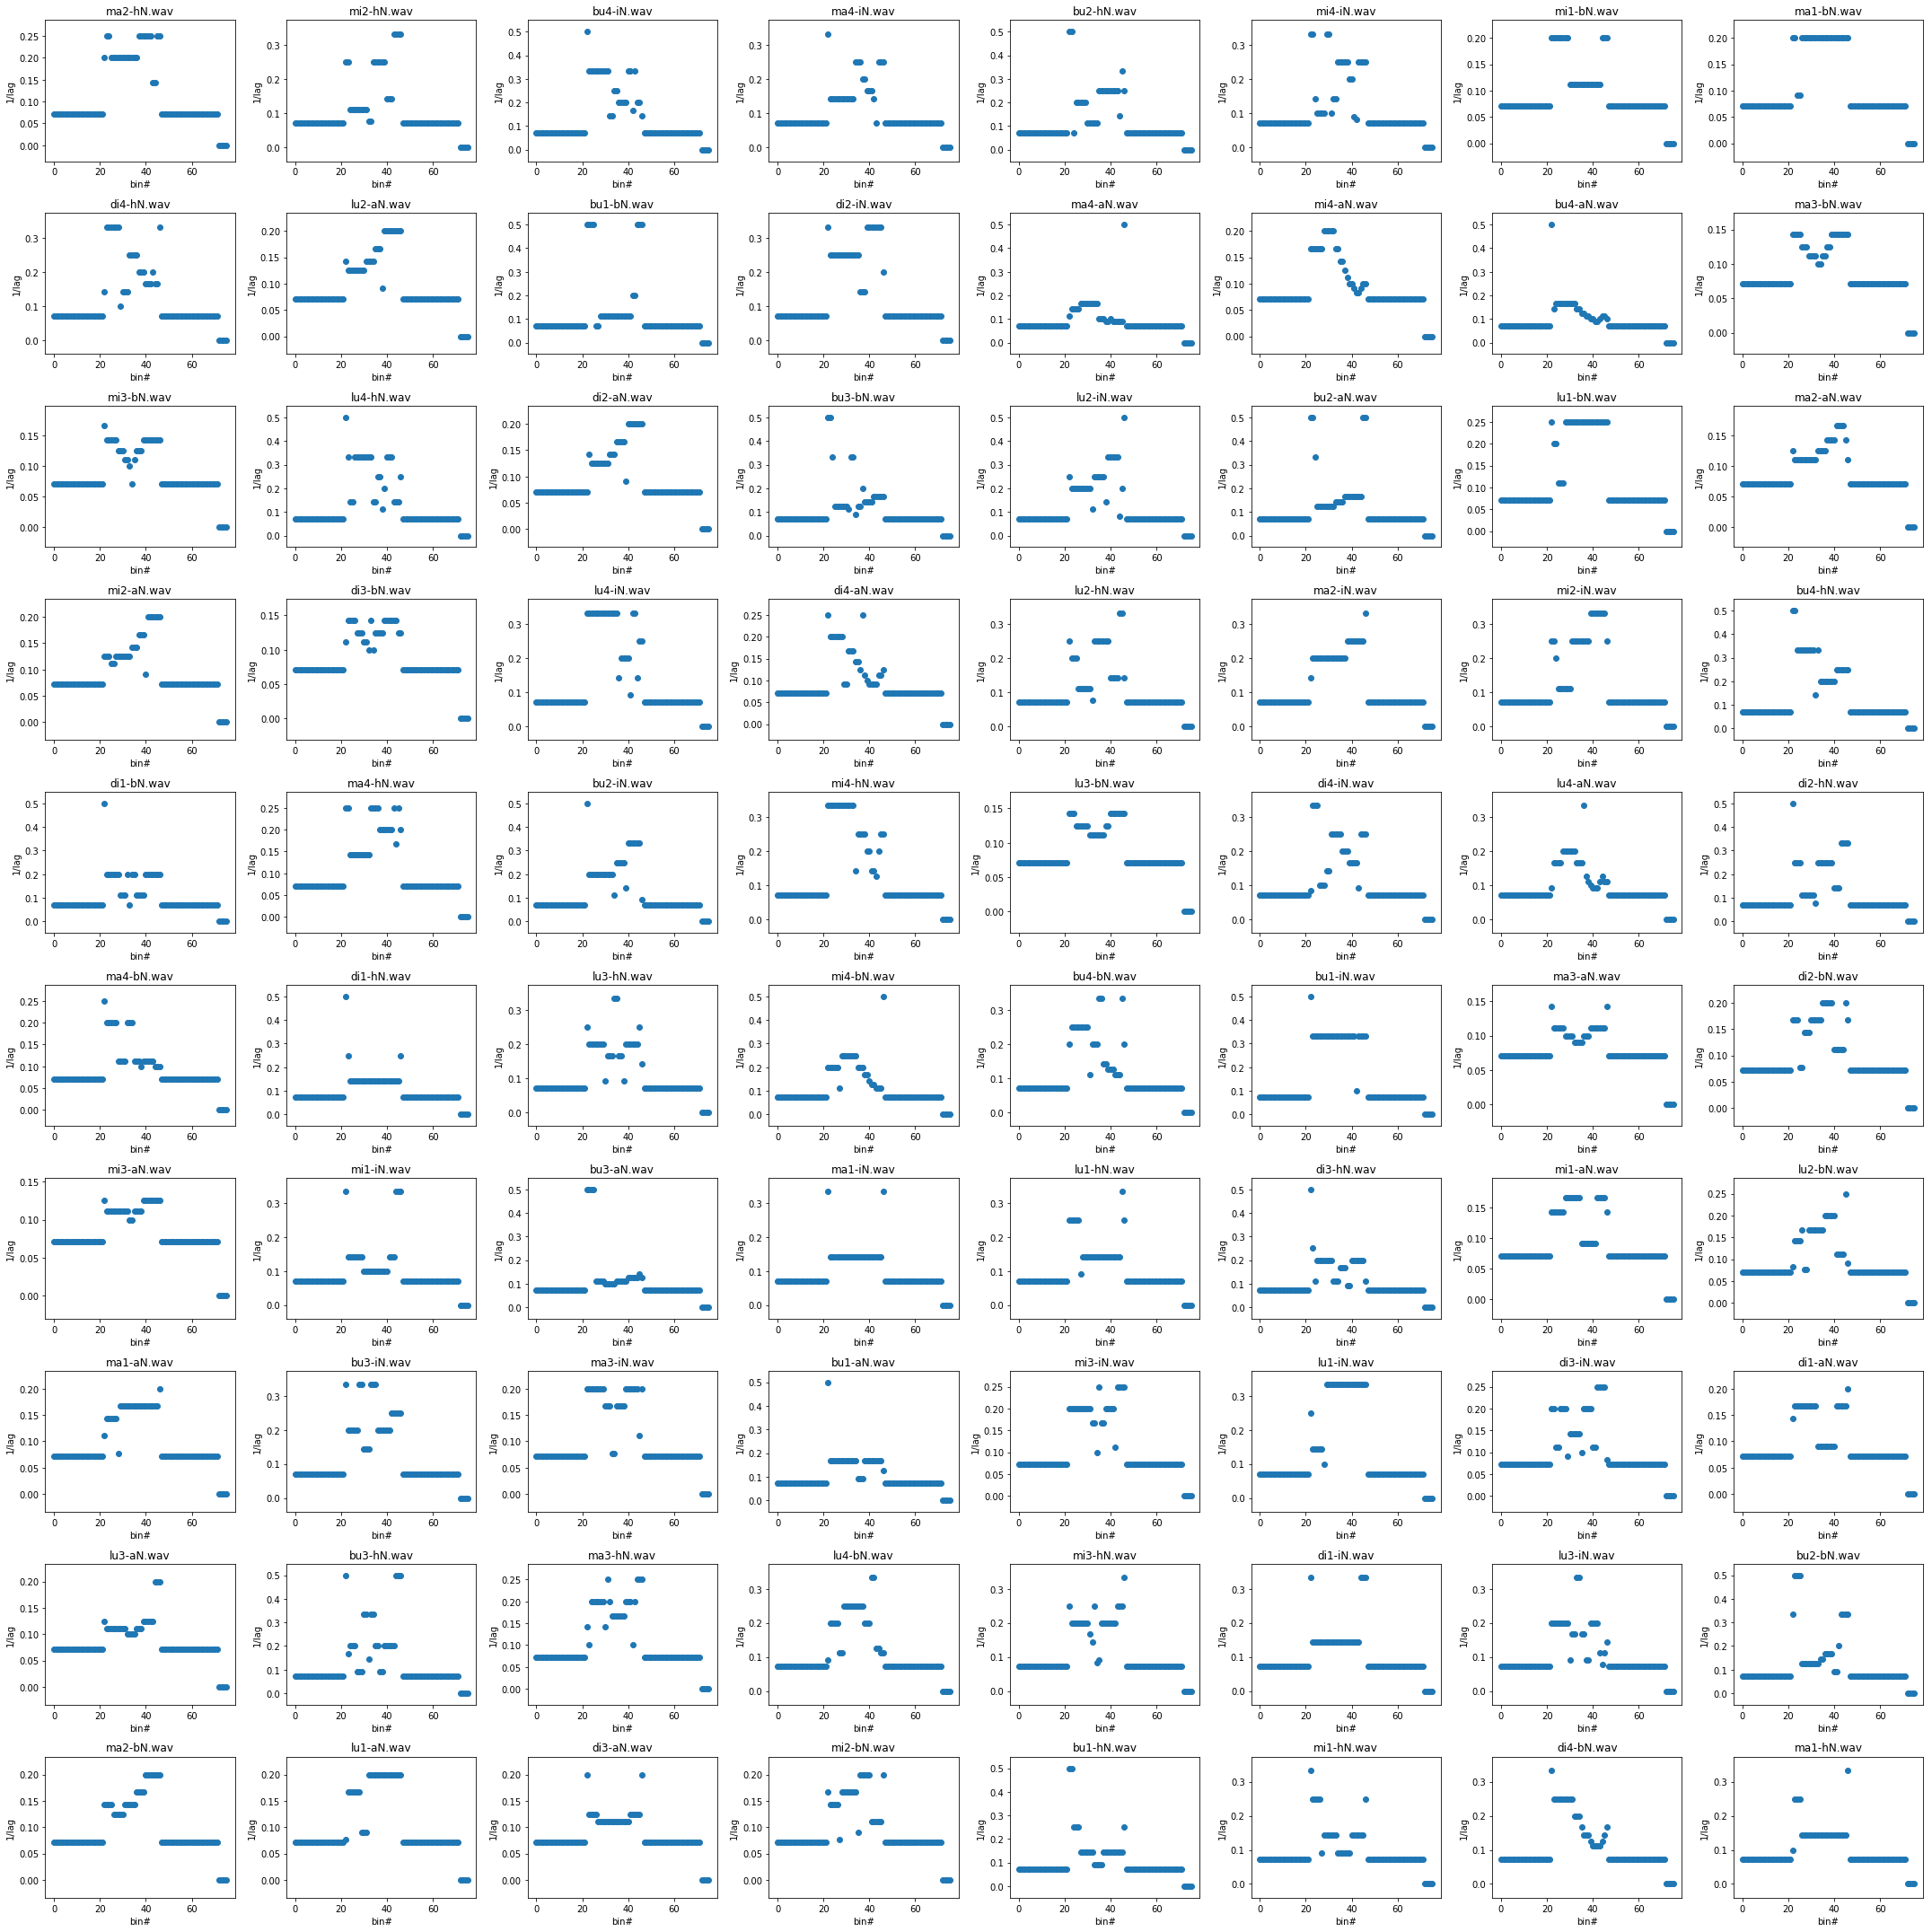

In [158]:
p = 1
fig = plt.figure(figsize = (30,30))
for i in dataLag:
    plt.subplot(10,8,p)
    plt.scatter(dataBin['bin'],dataLag[i])
    plt.title(i)
    plt.ylabel('1/lag')
    plt.xlabel('bin#')
    p += 1 
plt.tight_layout()
plt.show()

In [40]:
print(len(tones))

80


## Autocorr wav file x stim

### trial x correlation coefficient for 60 ms delay

In [11]:
##Create overlaping time bins (40ms time bins overlaped by 20ms)
##this exports a dataframe for each trial, autocorrelated and normalized from -1 to 1
import pandas as pd
import itertools
import matplotlib as pyplot

dataFFR = pd.DataFrame()
dataLag = pd.DataFrame()

test = np.where((behav['block'] < 11))[0]
# test.tolist()
# print(test)

# myhg = np.mean(hg_stim[myidx, :, 15], axis = 0)


for i in test:
    file = behav['file'][i]
#     data[file] = np.zeros(23)
    myhg = hg_stim[i, :, 15]
#     print(len(myhg))
    start = -500 
    end = -420

    cor = np.zeros((72,81))
    d = np.zeros((72,81))
    dataLag = pd.DataFrame()
    dataLag[i] = np.zeros(76)

# #separate the data into times
    for x in range(0,72):
        index = np.where((time_axis <= end) & (time_axis >= start))[0]
        d[x,:] = myhg[index]
    #     d["bin{0}".format(x)]= myhg[index]
        end += 20
        start += 20

# data2 = pd.DataFrame()
# # do autocorr on all bins
    maxs = []
    lag = []
    for bins in range(0,d.shape[0]):
        cor[bins,:] = autocorr(d[bins,:]) ## run autocorrelation
    for bins in range(1,cor.shape[0]): 
        maxx = max(cor[bins][2:15]) ##find the max
        maxs.append(maxx) #add max to a list
        lags = np.where(cor[bins] == maxx) ##finding the lag
        lag.append(lags[0].tolist())
        for time in range(2,15):
                if cor[bins,time] == maxx:
                    dataLag[i][time] = 1/time

##Normalized from -1 to 1
    norms = []
    for m in maxs:
        high = max(maxs)
        low = min(maxs)
        n = 2*((m-low)/(high-low)) - 1
        norms.append(n)
    dataFFR[file + '_'+ str(i)] = norms
    bins = [item for sublist in lag for item in sublist]
    lags = [1/x for x in bins]
    dataFFR['bin_' + str(i)] = bins
    dataFFR['lag_' + str(i)] = lags

dataFFR = dataFFR
    ### get lags-1
#     lag = list(itertools.chain.from_iterable(lag))
#     print(lag)
#     lags = [1/x for x in lag]

/Users/alia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


In [248]:
import statsmodels.api as sm

## read through the stim autocorr
'''data2 is the individual stim, dataFFR is the neural response'''
f = 1
corr_trial = pd.DataFrame()
trial = 0
cors = []
trials = []
l = 1
corr_trial[tones[t]] = np.zeros(80)
corr_trial['trials'] = np.zeros(80)
for j in data2:
    for i in dataFFR:
        if 'ma1-hN.wav' == j:
            if j[0:5] in i:
                print('yes')
                cor = np.corrcoef(dataFFR[i][28:43],data2[j][25:40])[0][1]
                ##this elicits a trial x correlation coefficient 
                cors.append(cor)
                trials.append(trial)
                trial+=1
                l += 1
corr_trial[tones[t]][0:len(cors)] = cors[0:len(cors)]
corr_trial['trials'][0:len(trials)] = trials[0:len(trials)]
f+=1
        # #             if cor > 8:
        #             plt.scatter(trial, cor)



# plt.tight_layout()
# plt.show()

yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


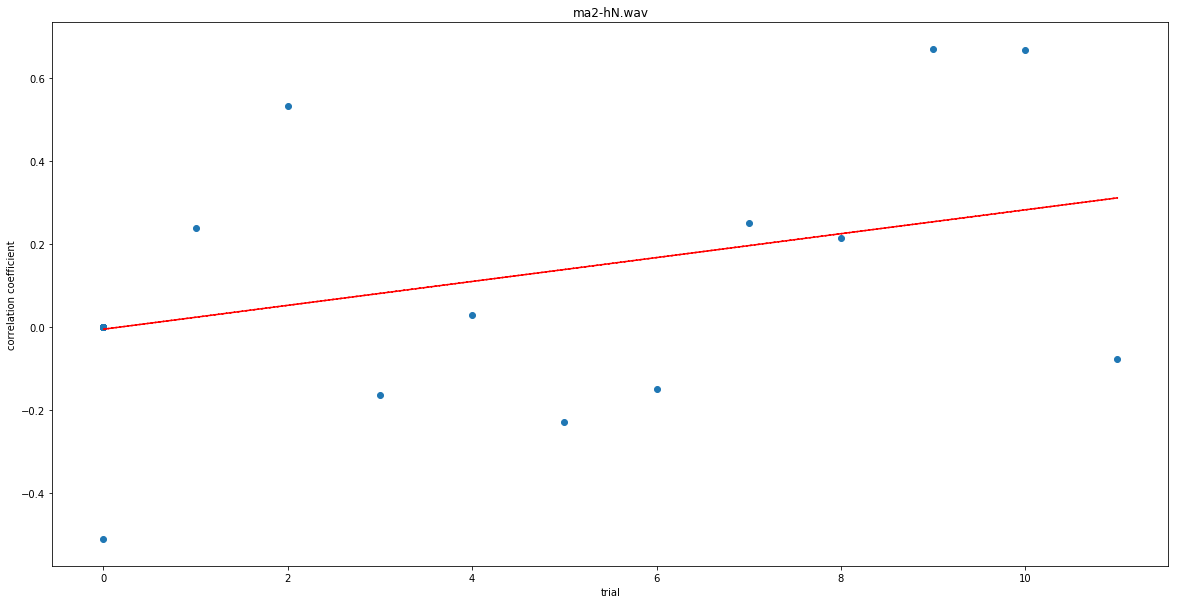

In [249]:
fig = plt.figure(figsize = (20,10))
trials = corr_trial['trials']
cors = corr_trial[c]
plt.scatter(corr_trial['trials'],corr_trial[c])
z = np.polyfit(trials, cors, 1)
p = np.poly1d(z)
plt.plot(trials,p(trials),"r--")
plt.title('ma2-hN.wav')
plt.ylabel('correlation coefficient')
plt.xlabel('trial')
tx += 1
f+=1
plt.show()

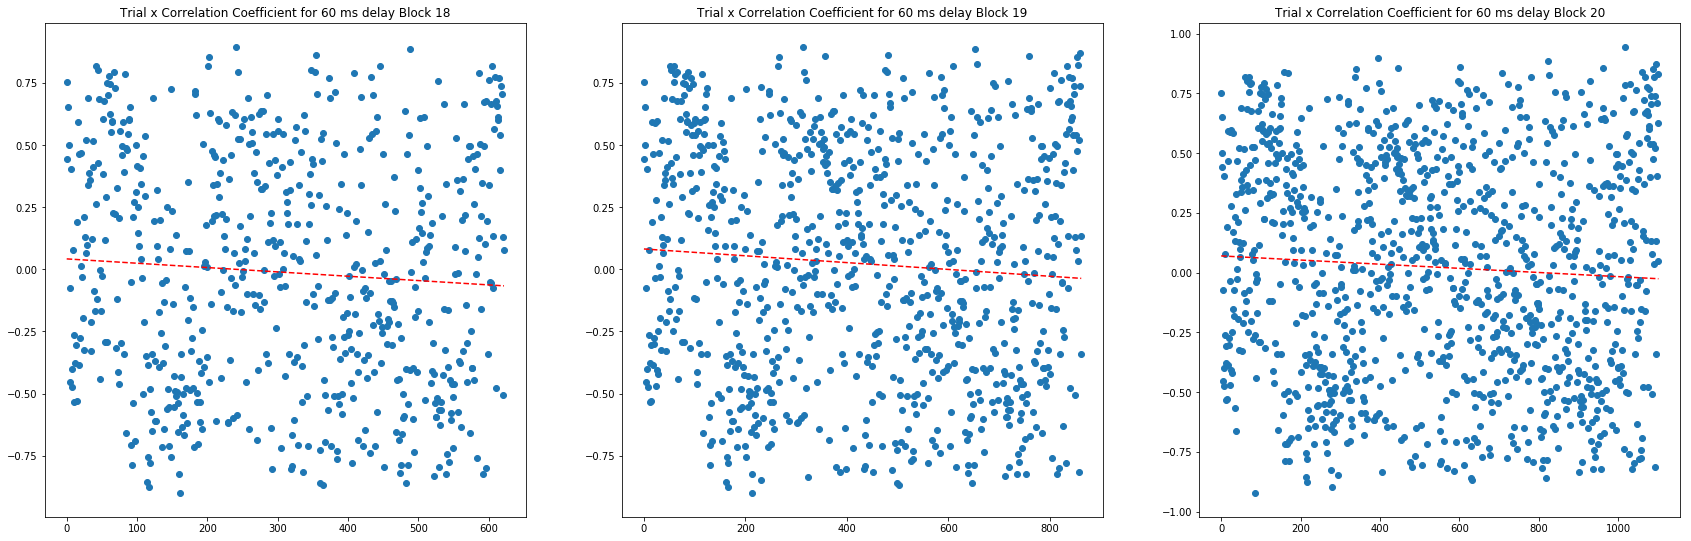

In [26]:
import statsmodels.api as sm

## read through the stim autocorr
'''data2 is the individual stim, dataFFR is the neural response'''
corr_trial = pd.DataFrame()
trial = 0
fig = plt.figure(figsize = (50,20))
cors = []
trials = []
l = 1
for j in data2:
    for i in dataFFR_block18:
        if j[0:5] in i:
            cor = np.corrcoef(dataFFR_block18[i][28:43],data2[j][25:40])[0][1]
            ##this elicits a trial x correlation coefficient 
            corr_trial[i] = cor
#             z = max(cor)
            cors.append(cor)
            trials.append(trial)
#           plt.plot(cor)
            trial+=1
            l += 1
# #             if cor > 8:
#          plt.scatter(trial, cor)
plt.subplot(2,5,1)
plt.scatter(trials, cors)
plt.title('Trial x Correlation Coefficient for 60 ms delay Block 18')
z = np.polyfit(trials, cors, 1)
p = np.poly1d(z)
plt.plot(trials,p(trials),"r--")
corr_trial

## read through the stim autocorr
'''data2 is the individual stim, dataFFR is the neural response'''
corr_trial = pd.DataFrame()
trial = 0
cors = []
trials = []
l = 1
for j in data2:
    for i in dataFFR_block19:
        if j[0:5] in i:
            cor = np.corrcoef(dataFFR_block19[i][28:43],data2[j][25:40])[0][1]
            ##this elicits a trial x correlation coefficient 
            corr_trial[i] = cor
#             z = max(cor)
            cors.append(cor)
            trials.append(trial)
#           plt.plot(cor)
            trial+=1
            l += 1
# #             if cor > 8:
#          plt.scatter(trial, cor)
plt.subplot(2,5,2)
plt.scatter(trials, cors)
plt.title('Trial x Correlation Coefficient for 60 ms delay Block 19')
z = np.polyfit(trials, cors, 1)
p = np.poly1d(z)
plt.plot(trials,p(trials),"r--")
corr_trial

## read through the stim autocorr
'''data2 is the individual stim, dataFFR is the neural response'''
corr_trial = pd.DataFrame()
trial = 0
cors = []
trials = []
l = 1
for j in data2:
    for i in dataFFR_block20:
        if j[0:5] in i:
            cor = np.corrcoef(dataFFR_block20[i][28:43],data2[j][25:40])[0][1]
            ##this elicits a trial x correlation coefficient 
            corr_trial[i] = cor
#             z = max(cor)
            cors.append(cor)
            trials.append(trial)
#           plt.plot(cor)
            trial+=1
            l += 1
# #             if cor > 8:
#          plt.scatter(trial, cor)
plt.subplot(2,5,3)
plt.scatter(trials, cors)
plt.title('Trial x Correlation Coefficient for 60 ms delay Block 20')
z = np.polyfit(trials, cors, 1)
p = np.poly1d(z)
plt.plot(trials,p(trials),"r--")
corr_trial


# ## read through the stim autocorr
# '''data2 is the individual stim, dataFFR is the neural response'''
# corr_trial = pd.DataFrame()
# trial = 0
# cors = []
# trials = []
# l = 1
# for j in data2:
#     for i in dataFFR_block4:
#         if j[0:5] in i:
#             cor = np.corrcoef(dataFFR_block4[i][28:43],data2[j][25:40])[0][1]
#             ##this elicits a trial x correlation coefficient 
#             corr_trial[i] = cor
# #             z = max(cor)
#             cors.append(cor)
#             trials.append(trial)
# #           plt.plot(cor)
#             trial+=1
#             l += 1
# # #             if cor > 8:
# #          plt.scatter(trial, cor)
# plt.subplot(2,5,4)
# plt.scatter(trials, cors)
# plt.title('Trial x Correlation Coefficient for 60 ms delay Block 4')
# z = np.polyfit(trials, cors, 1)
# p = np.poly1d(z)
# plt.plot(trials,p(trials),"r--")
# corr_trial


# ## read through the stim autocorr
# '''data2 is the individual stim, dataFFR is the neural response'''
# corr_trial = pd.DataFrame()
# trial = 0
# cors = []
# trials = []
# l = 1
# for j in data2:
#     for i in dataFFR_block5:
#         if j[0:5] in i:
#             cor = np.corrcoef(dataFFR_block5[i][28:43],data2[j][25:40])[0][1]
#             ##this elicits a trial x correlation coefficient 
#             corr_trial[i] = cor
# #             z = max(cor)
#             cors.append(cor)
#             trials.append(trial)
# #           plt.plot(cor)
#             trial+=1
#             l += 1
# # #             if cor > 8:
# #          plt.scatter(trial, cor)
# plt.subplot(2,5,5)
# plt.scatter(trials, cors)
# plt.title('Trial x Correlation Coefficient for 60 ms delay Block 5')
# z = np.polyfit(trials, cors, 1)
# p = np.poly1d(z)
# plt.plot(trials,p(trials),"r--")
# corr_trial


# ## read through the stim autocorr
# '''data2 is the individual stim, dataFFR is the neural response'''
# corr_trial = pd.DataFrame()
# trial = 0
# cors = []
# trials = []
# l = 1
# for j in data2:
#     for i in dataFFR_block6:
#         if j[0:5] in i:
#             cor = np.corrcoef(dataFFR_block6[i][28:43],data2[j][25:40])[0][1]
#             ##this elicits a trial x correlation coefficient 
#             corr_trial[i] = cor
# #             z = max(cor)
#             cors.append(cor)
#             trials.append(trial)
# #           plt.plot(cor)
#             trial+=1
#             l += 1
# # #             if cor > 8:
# #          plt.scatter(trial, cor)
# plt.subplot(2,5,6)
# plt.scatter(trials, cors)
# plt.title('Trial x Correlation Coefficient for 60 ms delay Block 6')
# z = np.polyfit(trials, cors, 1)
# p = np.poly1d(z)
# plt.plot(trials,p(trials),"r--")
# corr_trial


# ## read through the stim autocorr
# '''data2 is the individual stim, dataFFR is the neural response'''
# corr_trial = pd.DataFrame()
# trial = 0
# cors = []
# trials = []
# l = 1
# for j in data2:
#     for i in dataFFR_block7:
#         if j[0:5] in i:
#             cor = np.corrcoef(dataFFR_block7[i][28:43],data2[j][25:40])[0][1]
#             ##this elicits a trial x correlation coefficient 
#             corr_trial[i] = cor
# #             z = max(cor)
#             cors.append(cor)
#             trials.append(trial)
# #           plt.plot(cor)
#             trial+=1
#             l += 1
# # #             if cor > 8:
# #          plt.scatter(trial, cor)
# plt.subplot(2,5,7)
# plt.scatter(trials, cors)
# plt.title('Trial x Correlation Coefficient for 60 ms delay Block 7')
# z = np.polyfit(trials, cors, 1)
# p = np.poly1d(z)
# plt.plot(trials,p(trials),"r--")
# corr_trial


# ## read through the stim autocorr
# '''data2 is the individual stim, dataFFR is the neural response'''
# corr_trial = pd.DataFrame()
# trial = 0
# cors = []
# trials = []
# l = 1
# for j in data2:
#     for i in dataFFR_block8:
#         if j[0:5] in i:
#             cor = np.corrcoef(dataFFR_block8[i][28:43],data2[j][25:40])[0][1]
#             ##this elicits a trial x correlation coefficient 
#             corr_trial[i] = cor
# #             z = max(cor)
#             cors.append(cor)
#             trials.append(trial)
# #           plt.plot(cor)
#             trial+=1
#             l += 1
# # #             if cor > 8:
# #          plt.scatter(trial, cor)
# plt.subplot(2,5,8)
# plt.scatter(trials, cors)
# plt.title('Trial x Correlation Coefficient for 60 ms delay Block 8')
# z = np.polyfit(trials, cors, 1)
# p = np.poly1d(z)
# plt.plot(trials,p(trials),"r--")
# corr_trial


# ## read through the stim autocorr
# '''data2 is the individual stim, dataFFR is the neural response'''
# corr_trial = pd.DataFrame()
# trial = 0
# cors = []
# trials = []
# l = 1
# for j in data2:
#     for i in dataFFR_block9:
#         if j[0:5] in i:
#             cor = np.corrcoef(dataFFR_block9[i][28:43],data2[j][25:40])[0][1]
#             ##this elicits a trial x correlation coefficient 
#             corr_trial[i] = cor
# #             z = max(cor)
#             cors.append(cor)
#             trials.append(trial)
# #           plt.plot(cor)
#             trial+=1
#             l += 1
# # #             if cor > 8:
# #          plt.scatter(trial, cor)
# plt.subplot(2,5,9)
# plt.scatter(trials, cors)
# plt.title('Trial x Correlation Coefficient for 60 ms delay Block 9')
# z = np.polyfit(trials, cors, 1)
# p = np.poly1d(z)
# plt.plot(trials,p(trials),"r--")

plt.show()

# corr_trial




In [180]:
for y in range(len(cors)):
    if cors[y] == max(cors):
        print(y)

1540


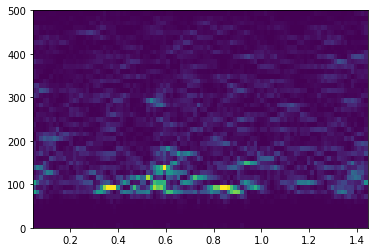

bu2-hN


In [184]:
myhg = hg_stim[1540, :, 15]
myhg = myhg[(time_axis >= -500) & (time_axis <= 1000)]
fs = 1000
f,t, Sxx = signal.spectrogram(myhg, fs, noverlap = 76, nperseg =90)
plt.pcolormesh(t,f,Sxx, vmax = np.percentile(Sxx.flatten(), 99.9))
plt.show()

print(behav['file'][1540])

In [ ]:
for j in data2:
    for i in dataFFR:
        if j[0:5] in i:
            cor = np.corrcoef(dataFFR[i][28:43],data2[j][25:40])[0][1]
            ##this elicits a trial x correlation coefficient 
            corr_trial[i] = cor
#             z = max(cor)
            cors.append(cor)
            trials.append(trial)
#           plt.plot(cor)
            trial+=1
# #             if cor > 8:
#             plt.scatter(trial, cor)
plt.boxplot(trials, cors)
plt.title('Trial x Correlation Coefficient for 60 ms delay')
plt.show()
corr_trial


## Autocorr Wav File x Stim

In [ ]:
##Autocorr on wav file
start = 0 
end = 40
cor = np.zeros((73,40))
d = np.zeros((73,40))
lag = []
#separate the data into times
for x in range(53):
    index = list(range(start,end))
    d[x,:] = av[index]
    end += 20
    start += 20 
data2 = pd.DataFrame()
# # do autocorr on all bins 
for bins in range(0,d.shape[0]): 
    cor[bins,:] = autocorr(d[bins,:])

data = pd.DataFrame()
data['1/lag'] = np.zeros(73)
data['max'] = np.zeros(73)
# data['lag'] = np.zeros(5)
##find 1/lag
for i in range(0,cor.shape[1]):
    if i > 0:
        freqs = 1/i
        freq.append(freqs)

for j in range(0,cor.shape[0]):
    nozero = cor[j,2:8]
    maxes = max(nozero)
    for time in range(2,8):
        if cor[j,time] == maxes:
            data['1/lag'][j] = 1/time
            data['max'][j] = cor[j,time]
a = [x for x in range(len(data))]
data['bin'] = a
plt.scatter(data['bin'],data['1/lag'])
plt.xlabel('bin#')
plt.ylabel('1/lag')
plt.title(' max 1/lag vs bin number, ignoring lag values higher than 6')
plt.show()

t = np.where(data['1/lag'] == .2)

dataWav1 = data
print(t)

## Plot AutoCorr 1/lag

In [ ]:

plt.scatter(range(len(lags)), lags)
plt.xlabel('bin #', fontsize = 20.0)
plt.ylabel('1/lag', fontsize = 20.0)
plt.show()

## Average Wav File

In [ ]:
##read wav file 
import scipy.io
import os

'''autocorr the stimulation wav files t = tone, p = b or h, male or female'''
dirs = os.listdir('/Users/alia/Documents/dura/userdata/ashafi/alia_temp_1/stimwav/')
tone = []
files = []
lists = []
tones = []
start = 0
end = 50
positive = np.zeros((558,))
negative = np.zeros((500,))

data = pd.DataFrame()

# print(d.shape)
for file in dirs:
    if '1' in file:
        tone.append(file)
#         if 'b' in file[-7:-1]:
#             tone.append(file)
print(tone)

test = []
for i in tone:
    y, sr= librosa.load('/Users/alia/Documents/dura/userdata/ashafi/alia_temp_1/stimwav/' + i, sr = 1000) ##changes the sr to 1000
    a= librosa.load('/Users/alia/Documents/dura/userdata/ashafi/alia_temp_1/stimwav/' + i, sr = 1000) ##changes the sr to 1000
    y = np.append(y,positive)
    y = np.insert(y,0,negative)
    test.append(y)
    f,t, Sxx = signal.spectrogram(y, sr, noverlap = 76, nperseg =90)
    Sxx = np.array(Sxx).tolist()
    tones.append(Sxx)
    
t1 = t

In [ ]:
##average wav form of tones
av = np.mean(test, axis = 0)
plt.plot(av)
plt.show()
x = list(range(0,5))
print(len(av))

In [ ]:
##Autocorr on wav file
start = 0 
end = 40
cor = np.zeros((73,40))
d = np.zeros((73,40))
lag = []
#separate the data into times
for x in range(53):
    index = list(range(start,end))
    d[x,:] = av[index]
    end += 20
    start += 20 
data2 = pd.DataFrame()
# # do autocorr on all bins 
for bins in range(0,d.shape[0]): 
    cor[bins,:] = autocorr(d[bins,:])

data = pd.DataFrame()
data['1/lag'] = np.zeros(73)
data['max'] = np.zeros(73)
# data['lag'] = np.zeros(5)
##find 1/lag
for i in range(0,cor.shape[1]):
    if i > 0:
        freqs = 1/i
        freq.append(freqs)

for j in range(0,cor.shape[0]):
    nozero = cor[j,2:8]
    maxes = max(nozero)
    for time in range(2,8):
        if cor[j,time] == maxes:
            data['1/lag'][j] = 1/time
            data['max'][j] = cor[j,time]
a = [x for x in range(len(data))]
data['bin'] = a
plt.scatter(data['bin'],data['1/lag'])
plt.xlabel('bin#')
plt.ylabel('1/lag')
plt.title(' max 1/lag vs bin number, ignoring lag values higher than 6')
plt.show()

t = np.where(data['1/lag'] == .2)

dataWav1 = data
print(t)

In [ ]:
fig = plt.figure(figsize = (10,5))
plt.subplot(1, 2, 1)
plt.scatter(dataWav1['bin'][20:45], dataWav1['1/lag'][20:45])
plt.title('Tone1 F0 contour')
plt.subplot(1, 2, 2)
plt.scatter(dataFFR1['bin'][20:45], dataFFR4['1/lag'][20:45])
plt.title('Tone1 Elec16 F0 contour')
plt.ylabel('1/lag')
plt.xlabel('bin#')

plt.show()

In [ ]:
plt.scatter(dataWav1['bin'][20:50], dataWav1['1/lag'][20:50])
plt.scatter(dataFFR1['bin'][20:50], dataFFR1['1/lag'][20:50])
plt.xlabel('bin#')
plt.ylabel('1/lag')
plt.title('Correlation between stim and FFR')
plt.show()


In [ ]:
correlation1 = np.correlate(dataWav1['max'][24:60],dataFFR1['max'][24:60], 'same')
# correlation2 = np.correlate(dataWav2['max'],dataFFR2['max'], 'same')
# correlation3 = np.correlate(dataWav3['max'],dataFFR3['max'], 'same')
# correlation4 = np.correlate(dataWav4['max'],dataFFR4['max'], 'same')
# # plt.scatter(correlation, dataWav['1/lag'])
# plt.show()
plt.plot(correlation1, color='r')
# plt.plot(correlation2, color='b')
# plt.plot(correlation3, color='g')
# plt.plot(correlation4, color='c')
plt.title('Bin # vs Correlation')
plt.xlabel('Bin#')
plt.ylabel('R')
plt.show()

cors =  np.correlate(dataWav1['max'][24:60],dataFFR1['max'][24:60])
print(cors)

## Subplot

In [ ]:
myidx = np.where((behav['tone'] == 1) & (behav['speaker'] == 'b'))[0]
myhg = np.mean(hg_stim[myidx, :, 15], axis = 0)
myhg = myhg[(time_axis >= -300) & (time_axis <=800)]
fs = 1000
linex = [0,0,0,0,0]
liney = [0,100,200,300,500]

fig = plt.figure(figsize = (10,5))
avg = np.mean(tones, axis = 0)
librosa.output.write_wav('/Users/alia/Desktop/test.wav', avg, 1000)
plt.subplot(1, 2, 1)
t1 = np.subtract(t1,.3)
plt.pcolormesh(t1,f,avg, vmax = np.percentile(avg.flatten(), 99.9))
plt.plot(linex,liney, color = 'r')
plt.title('Flat Tone', fontsize = 20)
plt.xlabel('Time [sec]')
plt.ylabel('Freq [Hz]')

plt.subplot(1, 2, 2)
f,t, Sxx = signal.spectrogram(myhg, fs, noverlap = 76, nperseg =90)
t3 = np.subtract(t,.3)
plt.pcolormesh(t3,f,Sxx, vmax = np.percentile(Sxx.flatten(), 99.9))
plt.title('Neural Response', fontsize = 20)
plt.xlabel('Time [sec]')
plt.ylabel('Freq [Hz]')
plt.plot(linex,liney, color = 'r')
plt.tight_layout()
plt.show()

In [ ]:
tone2 = plt.pcolormesh(t1,f,avg, vmax = np.percentile(avg.flatten(), 99.9))

In [ ]:
fig = plt.figure(figsize = (10,5))


plt.subplot(1, 2, 1)
plt.pcolormesh(t1,f,avg, vmax = np.percentile(avg.flatten(), 99.9))
plt.plot(linex,liney, color = 'r')
plt.title('Rising Tone', fontsize = 20)
plt.xlabel('Time [sec]')
plt.ylabel('Freq [Hz]')

# plt.subplot(2, 2, 1)
# tone2
# plt.plot(linex,liney, color = 'r')
# plt.title('Flat Tone', fontsize = 20)
# plt.xlabel('Time [sec]')
# plt.ylabel('Freq [Hz]')|

# plt.subplot(1, 2, 2)
# plt.scatter(dataWav['bin'], dataWav['1/lag'])
# plt.scatter(dataWav2['bin'], dataWav2['1/lag'])
# plt.title('Tone2 vs Tone1 F0 contour')
# plt.ylabel('1/lag')
# plt.xlabel('bin#')
plt.show()

## Cross Corr

In [ ]:
import matplotlib as pyplt
##Get cross correlation between FFR and stim
stim = pd.read_csv('autocorr_Mtone3_stim.csv',index_col=None, header=0, encoding = "ISO-8859-1")
FFR = pd.read_csv('autocorr_tone3.csv',index_col=None, header=0, encoding = "ISO-8859-1")

print(stim.shape)
print(FFR.shape)
#cross corr every bin 
crosscorr = []
for a in FFR:
    if a != 'bin0':
        cross = np.correlate(stim[a],FFR[a])
        crosscorr.append(cross)
                                
print(crosscorr)
plt.scatter(crosscorr, range(len(crosscorr)))
plt.title('Male Tone3 CrossCorr')
plt.show()

In [ ]:
def load(file):
    y, sr = librosa.load('/Users/alia/Documents/dura/userdata/ashafi/alia_temp_1/stimwav/' + file, sr = 1000) 


In [ ]:
plt.figure(figsize=(12,4))
plt.plot(np.linspace(-750, 750, 1501),myauto)
plt.xlim(-100, 400)
plt.show()

In [ ]:
myauto.shape

In [ ]:
#Try librosa piptrack to detect pitch -- returns magnitude and frequency 
from librosa.core.pitch import piptrack

In [ ]:
y, sr = librosa.load('/Users/alia/Desktop/thing.wav')
from librosa.core.pitch import piptrack
pitches, magnitudes = librosa.piptrack(y=y, sr=sr)



In [ ]:
plt.plot(pitches, magnitudes)


In [ ]:
pitches, magnitudes = librosa.piptrack(y=myhg, sr=fs, n_fft = 90, hop_length = 14)

In [ ]:
plt.hist(pitches, 10)


In [ ]:
magnitudes[19,:]

In [ ]:
plt.imshow(magnitudes, aspect = 'auto', origin = 'lower')
plt.show()

In [ ]:
thrmag = magnitudes > 1

In [ ]:
plt.plot(pitches[thrmag])
plt.show()

In [ ]:

plt.imshow(magnitudes, aspect = 'auto', origin = 'lower')
plt.show()

In [ ]:
def detect_pitch(y, sr, t):
  index = magnitudes[:, t].argmax()
  pitch = pitches[index, t]

  return pitch

In [ ]:
fig = plt.figure(figsize = (15,5))
plt.subplot(1, 2, 1)
myidx = np.where((behav['tone'] == 1) & (behav['speaker'] == 'b'))[0]
                
myhg = np.mean(hg_stim[myidx, :, 15], axis = 0)
myhg = myhg[(time_axis >= -500) & (time_axis <= 1000)]

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 10}
plt.rc('font', **font)

f,t, Sxx = signal.spectrogram(myhg, fs, noverlap = 76, nperseg =90)
newspec = Sxx
plt.pcolormesh(t - 0.5,f,newspec, vmax = np.percentile(Sxx.flatten(), 99.9))
    #             plt.ylabel('Frequency [Hz]', fontsize = 100.0)
plt.xlabel('Time [sec]', fontsize = 20.0)
plt.ylabel('Frequency [Hz]', fontsize = 20.0)
plt.title('Spectogram Electrode 16 Male T1', fontsize = 20)

plt.subplot(1, 2, 2)
plt.plot(time_axis, mymean, 'b')
plt.title('Electrode 16 Mean Waveform', fontsize = 20.0)


plt.show()

In [ ]:
test = [0,1,2,3]

In [ ]:
x = [0,0,0,0]

In [ ]:
plt.plot(x,test)

In [ ]:
plt.show()